# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 102840239
sectors = np.array([36])

period = 11.2010251560
tdepth = 0.0354211904**2

lc = pd.read_csv("TOI_815_36.csv", header=None)
contrastcurve_file = "Gemini_8m_G.csv"

band = 'Vis'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

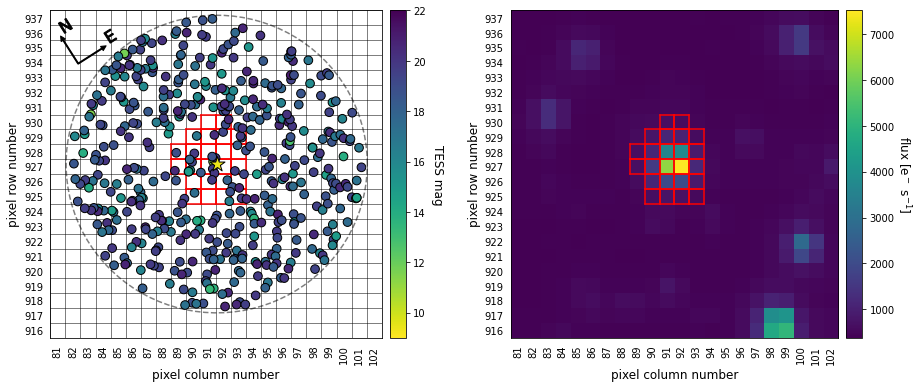

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,102840239,9.3600,8.531,8.066,7.999,155.871884,-43.834955,0.820000,0.759387,4953.89,16.718300,0.000,0.000
1,102840237,11.4114,10.128,9.504,9.283,155.870992,-43.833405,0.534121,0.537770,3766.00,16.825400,6.044,337.451
2,870239615,19.9965,NaN,NaN,NaN,155.873170,-43.832763,NaN,NaN,NaN,NaN,8.569,22.922
3,870239607,19.6073,NaN,NaN,NaN,155.868711,-43.835723,NaN,NaN,NaN,1.732690,8.692,251.457
4,870239614,18.7963,NaN,NaN,NaN,155.872031,-43.831612,NaN,NaN,NaN,0.145223,12.041,1.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,870239434,19.3982,NaN,NaN,NaN,155.936130,-43.866355,NaN,NaN,4511.00,0.395858,201.487,124.149
455,870256273,18.2337,NaN,NaN,NaN,155.912206,-43.787086,NaN,NaN,6055.00,0.231141,201.670,31.307
456,870256114,19.0632,NaN,NaN,NaN,155.947868,-43.846745,NaN,NaN,NaN,1.294410,201.809,102.167
457,102840147,16.9670,16.050,15.561,15.591,155.849053,-43.781255,0.850000,0.879463,5075.00,0.415458,202.215,342.935


In [4]:
ap = np.array([[90, 925], [91, 925], [92, 925], [93, 925], [90, 926], 
               [91, 926], [92, 926], [93, 926], [89, 927], [90, 927], 
               [91, 927], [92, 927], [93, 927], [89, 928], [90, 928], 
               [91, 928], [92, 928], [93, 928], [90, 929], [91, 929], 
               [92, 929], [93, 929], [91, 930], [92, 930]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,102840239,9.3600,8.531,8.066,7.999,155.871884,-43.834955,0.820000,0.759387,4953.89,16.718300,0.000,0.000,8.503530e-01,0.001475
1,102840237,11.4114,10.128,9.504,9.283,155.870992,-43.833405,0.534121,0.537770,3766.00,16.825400,6.044,337.451,1.287793e-01,0.009743
2,870239615,19.9965,NaN,NaN,NaN,155.873170,-43.832763,NaN,NaN,NaN,NaN,8.569,22.922,4.733397e-05,0.000000
3,870239607,19.6073,NaN,NaN,NaN,155.868711,-43.835723,NaN,NaN,NaN,1.732690,8.692,251.457,6.772780e-05,0.000000
4,870239614,18.7963,NaN,NaN,NaN,155.872031,-43.831612,NaN,NaN,NaN,0.145223,12.041,1.813,1.430222e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,870239434,19.3982,NaN,NaN,NaN,155.936130,-43.866355,NaN,NaN,4511.00,0.395858,201.487,124.149,7.641372e-29,0.000000
455,870256273,18.2337,NaN,NaN,NaN,155.912206,-43.787086,NaN,NaN,6055.00,0.231141,201.670,31.307,9.611468e-22,0.000000
456,870256114,19.0632,NaN,NaN,NaN,155.947868,-43.846745,NaN,NaN,NaN,1.294410,201.809,102.167,2.251915e-26,0.000000
457,102840147,16.9670,16.050,15.561,15.591,155.849053,-43.781255,0.850000,0.879463,5075.00,0.415458,202.215,342.935,6.226009e-23,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

102840237
870239623
102840234
870239622


# Ploting CC File

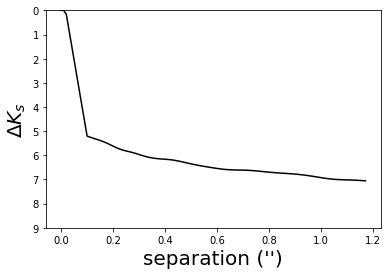

In [7]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [8]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 102840239.
Calculating EB and EBx2P scenario probabilities for 102840239.
Calculating PTP scenario probability for 102840239.
Calculating PEB and PEBx2P scenario probabilities for 102840239.
Calculating STP scenario probability for 102840239.
Calculating SEB and SEBx2P scenario probabilities for 102840239.
Calculating DTP scenario probability for 102840239.
Calculating DEB and DEBx2P scenario probabilities for 102840239.
Calculating BTP scenario probability for 102840239.
Calculating BEB and BEBx2P scenario probabilities for 102840239.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 102840237.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 870239623.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 102840234.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 870239622.
Wall time: 22min 2s


In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.00391831642628071
NFPP =  0.0032370905840227427


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,102840239,TP,0.820000,0.759387,11.201025,89.877203,0.078692,0.428153,260.616965,3.129617,0.000000,0.000000,9.069670e-01
1,102840239,EB,0.820000,0.759387,11.201025,86.520465,1.945397,0.013297,46.340355,0.000000,0.768161,0.759387,3.853141e-84
2,102840239,EBx2P,0.820000,0.759387,22.402050,88.655982,0.516132,0.810982,194.102686,0.000000,0.786825,0.759387,4.505707e-11
3,102840239,PTP,0.820000,0.759387,11.201025,89.974675,0.010988,0.050534,55.993922,3.153099,0.000000,0.000000,1.590731e-02
4,102840239,PEB,0.820000,0.759387,11.201025,88.392332,0.162159,0.852459,161.092692,0.000000,0.100740,0.121062,5.435386e-14
5,102840239,PEBx2P,0.820000,0.759387,22.402050,88.686326,0.509615,0.712882,168.097101,0.000000,0.811591,0.759387,1.912809e-14
6,102840239,STP,0.813015,0.759387,11.201025,88.902300,0.543733,0.322315,214.485535,4.602923,0.000000,0.000000,3.115887e-07
7,102840239,SEB,0.153569,0.185341,11.201025,89.726185,0.033408,0.961354,197.808711,0.000000,0.034370,0.100000,1.080540e-08
8,102840239,SEBx2P,0.171715,0.203568,22.402050,89.499539,0.223262,0.827185,149.420350,0.000000,0.171437,0.203298,1.378408e-08
9,102840239,DTP,0.820000,0.759387,11.201025,88.816169,0.413493,0.560381,191.319661,3.623720,0.000000,0.000000,7.320740e-02


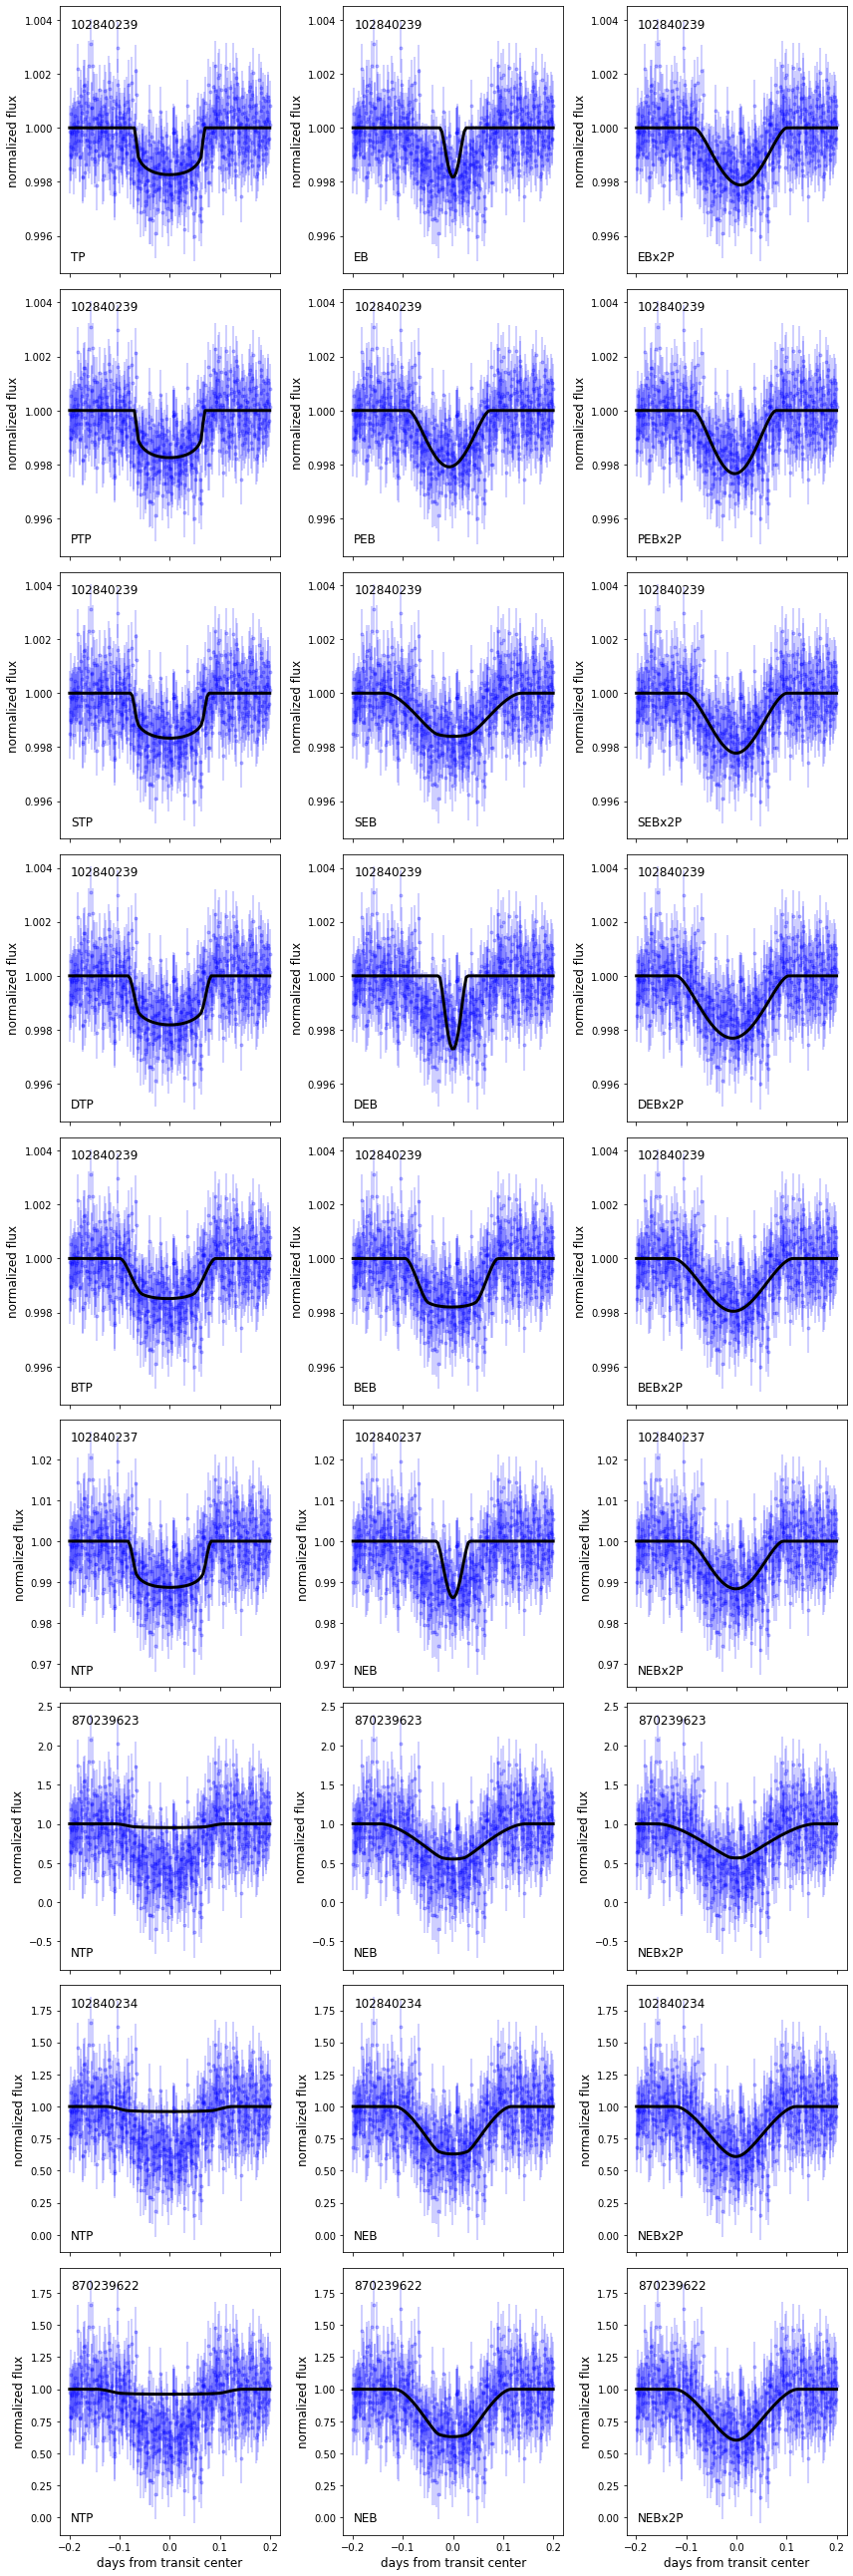

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))